# **Automatidata - Fare Amount Estimater - Graphical User Interface - ML - Gradient Boosting Regression Model**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor

import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

from math import sqrt
import pickle 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df2= pd.read_csv('df2.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


In [3]:
# Remove the target column from the features
X = df2.drop(columns=['fare_amount'])

# Set y variable
y = df2[['fare_amount']]

# Display first few rows
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


In [4]:
model_gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gradient_boosting.fit(X,y)

# Predict on the test set
y_pred_gradient_boosting = model_gradient_boosting.predict(X)

# Calculate evaluation metrics
r2_gradient_boosting = round(metrics.r2_score(y, y_pred_gradient_boosting) * 100, 3)
mse_gradient_boosting = round(metrics.mean_squared_error(y, y_pred_gradient_boosting),3)
mae_gradient_boosting = round(metrics.mean_absolute_error(y, y_pred_gradient_boosting),3)
rmse_gradient_boosting = round(np.sqrt(mse_gradient_boosting),3)

# Create a DataFrame to store the evaluation metrics for GradientBoostingRegressor
metrics_gradient_boosting = pd.DataFrame({'Model': ['Gradient Boosting Regression'],                            
                                          'R-squared': [r2_gradient_boosting],
                                          'Mean Squared Error (MSE)': [mse_gradient_boosting],
                                         
                                          'Root Mean Squared Error (RMSE)': [rmse_gradient_boosting],
                                          'Mean Absolute Error (MAE)': [mae_gradient_boosting]
                                         })

# Display the DataFrame for GradientBoostingRegressor
metrics_gradient_boosting

,Model,R-squared,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
0,Gradient Boosting Regression,87.646,13.727,3.705,2.057


In [5]:

# Convert y_pred_flat to a Pandas DataFrame
y_pred_df = pd.DataFrame({'Predicted Values': y_pred_gradient_boosting})

In [6]:
result = pd.merge(df2,y_pred_df,left_index=True, right_index=True)
result = result[['VendorID','passenger_count','mean_distance','mean_duration','rush_hour','fare_amount','Predicted Values']]
result['residual'] = result['fare_amount']-result['Predicted Values']
result.sample()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour,fare_amount,Predicted Values,residual
10105,2,1,1.032857,5.978571,0,6.0,6.136166,-0.136166


### **Visualize Multi Linear Regression model results**

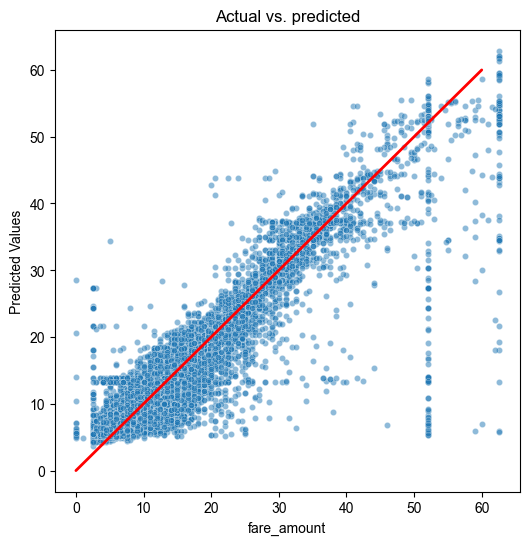

In [7]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='fare_amount',
                y='Predicted Values',
                data=result,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

### **Visualize the distribution of the residuals using a histogram**

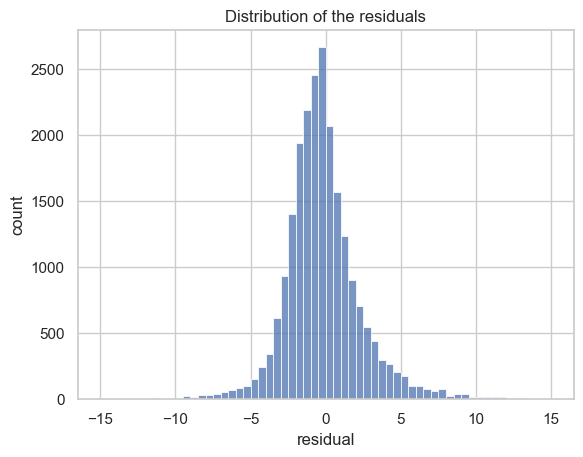

In [8]:
# Visualize the distribution of the `residuals`
sns.histplot(result['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual')
plt.ylabel('count');

### **Feature_importance**

In [9]:
feature_importance = pd.DataFrame(model_gradient_boosting.feature_importances_, index=X.columns, columns=['Importance'])
feature_importance

,Importance
VendorID,0.001484
passenger_count,0.001514
mean_distance,0.892359
mean_duration,0.103871
rush_hour,0.000771


## **Saving the trained model to a pickle file**

In [10]:
# Define the path to the folder where you want to save the model
path = 'F:/Case study/Interview preparation/01.Project/1. Automatidata/Final/'

In [11]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [12]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model


In [13]:
write_pickle(path,model_gradient_boosting,'Automatidata_GB_gui')

In [14]:
result.sample(5)

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour,fare_amount,Predicted Values,residual
10987,1,3,3.048333,20.511111,1,17.0,15.498786,1.501214
14787,1,1,2.321667,13.058333,0,14.5,11.570418,2.929582
2344,1,1,1.344500,14.037500,0,8.0,9.749875,-1.749875
22294,2,6,1.683478,12.531159,0,8.0,9.753816,-1.753816
17900,2,1,0.930000,5.533333,0,6.0,5.821356,0.178644


##  **Graphical user interface (GUI)**

In [ ]:
from tkinter import *
import pickle 
from sklearn import *

def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
  
    model = read_pickle(path,'Automatidata_GB_gui')

    input_features = [p1, p2, p3, p4, p5]
   
    
    print('input_features',input_features)
     
    result5=model.predict([input_features])
  
    Label(master,text='The fare amount is approximately ($)').grid(row=8)
    Label(master,text=result5).grid(row=9)
    print("The fare amount is approximately",result5)

    
master = Tk()
master.title("Taxi Fares Estimater")


label = Label(master, text = " Predicting Taxi Fare Amount Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="VendorID - [1, 2]  ").grid(row=1)
Label(master, text="passenger_count [1 to 6]").grid(row=2)
Label(master, text="Distance").grid(row=3)
Label(master, text="Duration").grid(row=4)
Label(master, text="rush_hour [no-0 ,yes-1]").grid(row=5)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)

Button(master, text='Predict fare', command=show_entry_fields).grid()


mainloop()